# CS577 Final Project: Lifestyle Factors on Mental Health and it's correlation to Physical Health

#### Contributor: Gybran Valdivia

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special

## Load the Data

In [2]:
health_data = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
# Determine the number of samples and features in the dataset
sample_num, feature_num = health_data.shape
print('Number Of Samples: ', sample_num) # the numbers of rows
print('Number Of Features: ', feature_num) # the number of cols

Number Of Samples:  319795
Number Of Features:  18


In [4]:
# Display the first few rows of the dataset to understand its structure
health_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
# Getting more info such as data types and seeing whether there are any null values
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# This will help get a better understanding of the distribution of the numerical columns
health_data.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


## Data Preprocessing

In [7]:
# Check for missing values
missing_data = health_data.isnull().sum()
print(missing_data)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Luckily there is no missing data (null values) in the dataset

In [8]:
# Removing columns that are not necessary for my analysis
excluded_data = ['PhysicalHealth', 'DiffWalking', 'GenHealth', 'Stroke']
selected_data = health_data.drop(columns=excluded_data, axis=1)
selected_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,MentalHealth,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,30.0,Female,55-59,White,Yes,Yes,5.0,Yes,No,Yes
1,No,20.34,No,No,0.0,Female,80 or older,White,No,Yes,7.0,No,No,No
2,No,26.58,Yes,No,30.0,Male,65-69,White,Yes,Yes,8.0,Yes,No,No
3,No,24.21,No,No,0.0,Female,75-79,White,No,No,6.0,No,No,Yes
4,No,23.71,No,No,0.0,Female,40-44,White,No,Yes,8.0,No,No,No


In the context of my project, which aims to explore the impact of lifestyle factors on mental health and their correlation with physical health outcomes for adults, I dropped those features for these reasons:

1. PhysicalHealth: This column refers to the number of days, in the past 30 days, that the person considered their health "not good". While this is an important health indicator, my project focuses more on long-term health outcomes and their correlation with mental health. This column could be considered more of a short-term indicator rather than a lifestyle factor or a long-term health outcome.
2. DiffWalking: This column refers to whether the person has serious difficulty walking or climbing stairs. This is more of a result of a physical health condition rather than a lifestyle choice or a direct indicator of a chronic disease. It is more of a physical limitation or consequence rather than a cause or factor leading to long-term health outcomes.
3. GenHealth: This column refers to the persons self-evaluation of their health. This is a subjective evaluation which might be influenced by current mental and physical health states, hence, the evaluation could be inaccurate.
4. Stroke: This column refers to whether the person has ever had a stroke or been told that they had a stroke. While stroke is undoubtedly a significant health event, it could complicate the analysis. If looking to draw a clear connection between lifestyle factors and health outcomes, strokes can be the result of various risk factors, some of which might be less directly influenced by lifestyle factors.

#### Checking Unique Values

In [9]:
# Getting the number of our unique values for each variable. 
d = []
u = []
t = []
for col in selected_data:
    d.append(col)
    u.append(selected_data[col].nunique())
    t.append(selected_data[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,HeartDisease,object,2
1,BMI,float64,3604
2,Smoking,object,2
3,AlcoholDrinking,object,2
4,MentalHealth,float64,31
5,Sex,object,2
6,AgeCategory,object,13
7,Race,object,6
8,Diabetic,object,4
9,PhysicalActivity,object,2


In [10]:
# For "object" types, check their values to see if any cleaning needs to be done
for col in selected_data.columns:
    if selected_data[col].dtype == 'object':
        print(f"Unique values in '{col}': {selected_data[col].unique()}")

Unique values in 'HeartDisease': ['No' 'Yes']
Unique values in 'Smoking': ['Yes' 'No']
Unique values in 'AlcoholDrinking': ['No' 'Yes']
Unique values in 'Sex': ['Female' 'Male']
Unique values in 'AgeCategory': ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Unique values in 'Race': ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Unique values in 'Diabetic': ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique values in 'PhysicalActivity': ['Yes' 'No']
Unique values in 'Asthma': ['Yes' 'No']
Unique values in 'KidneyDisease': ['No' 'Yes']
Unique values in 'SkinCancer': ['Yes' 'No']


#### Cleaning "Diabetic" column

In [11]:
unique_diabetic_values = selected_data['Diabetic'].unique()
print(unique_diabetic_values)

['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [12]:
# convert diabetic to binary variable (yes/no only)
selected_data['Diabetic'] = selected_data['Diabetic'].replace('No, borderline diabetes', 'No')
selected_data['Diabetic'] = selected_data['Diabetic'].replace('Yes (during pregnancy)', 'Yes')

# Verify the cleaning by checking the unique values again
unique_diabetic_values_cleaned = selected_data['Diabetic'].unique()
print(unique_diabetic_values_cleaned)

['Yes' 'No']


## Exploratory Data Analysis (EDA) & Visualization

#### Visualizing Binary Variables

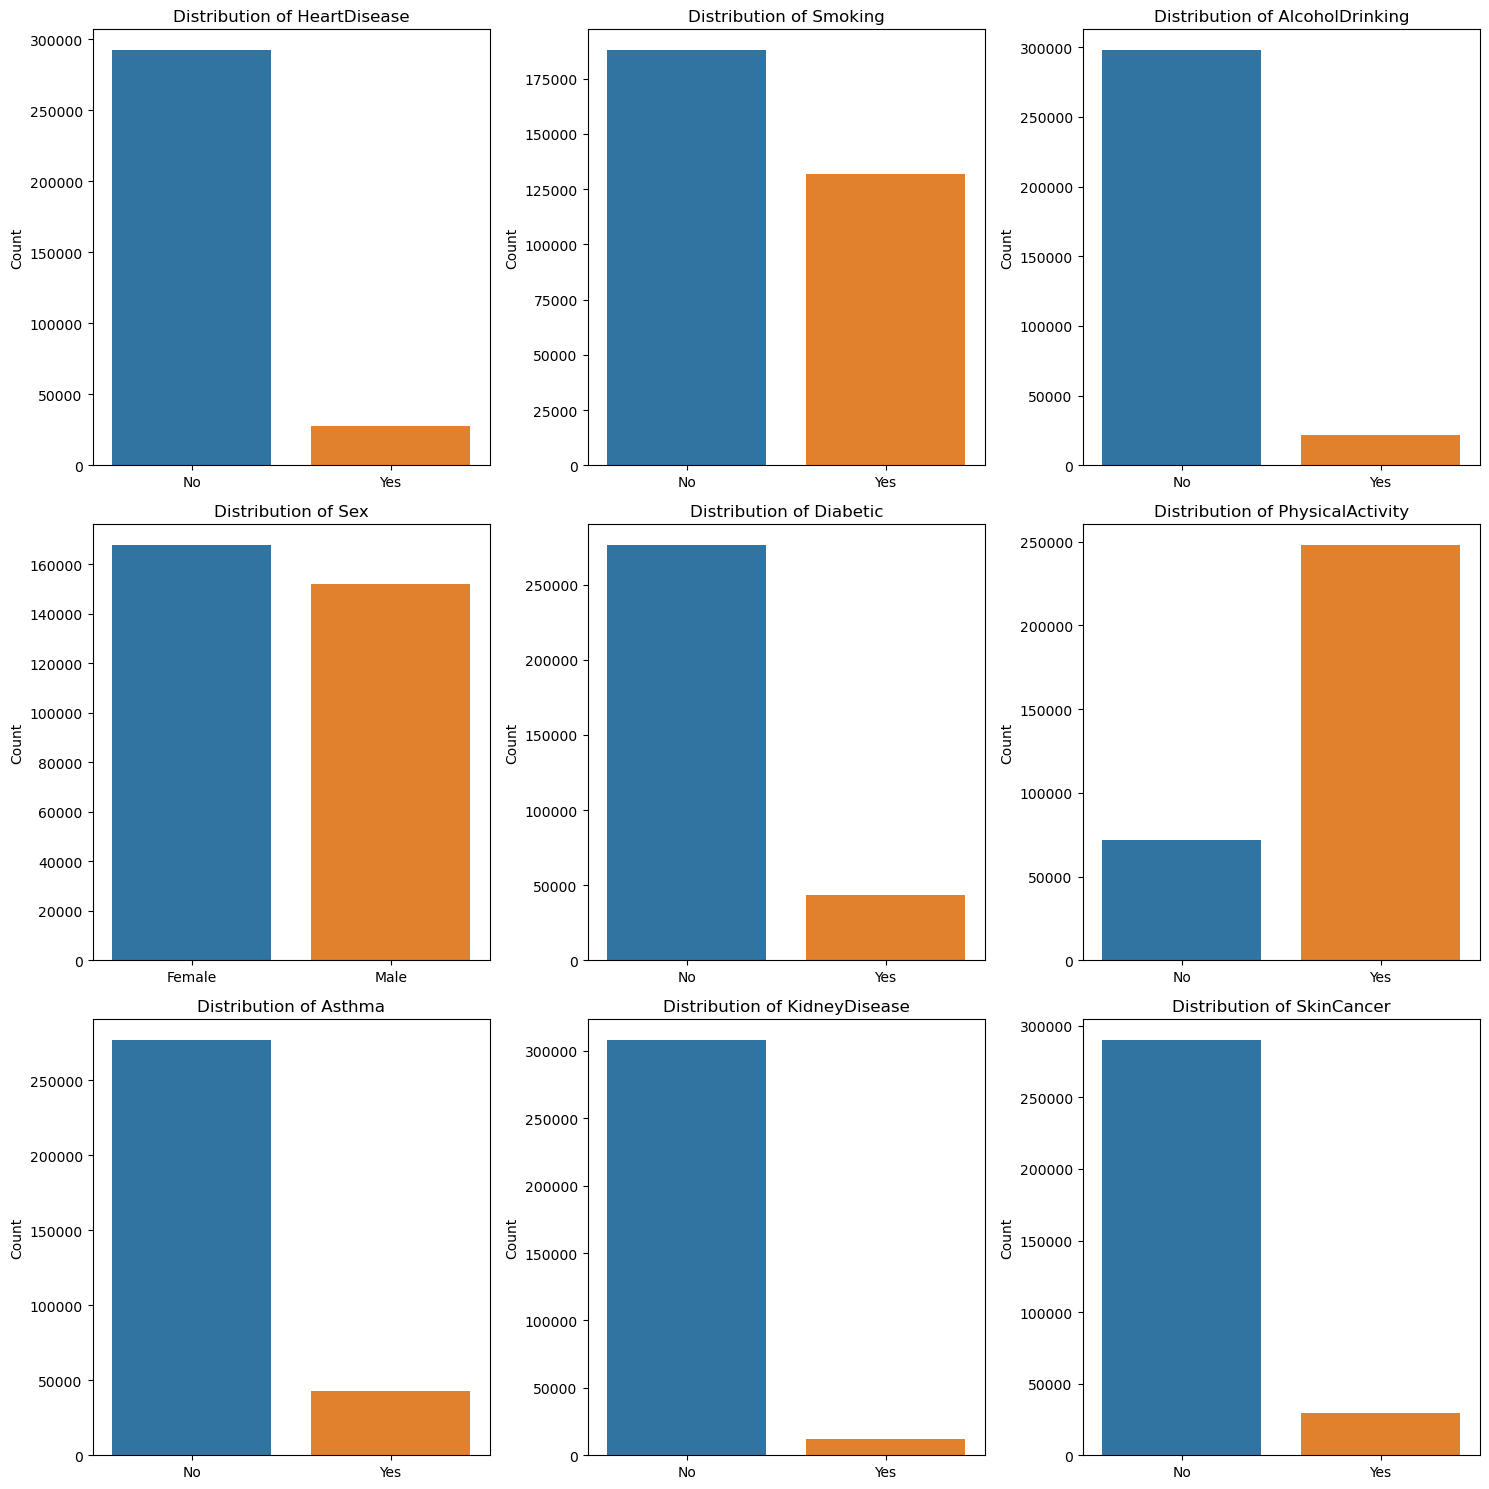

In [13]:
# Filter out binary variables
binary_vars = [col for col in selected_data.columns if selected_data[col].dtype == 'object' and selected_data[col].nunique() == 2]

# Calculate the number of rows needed for the subplot grid
n = len(binary_vars)
rows = n // 3 + (n % 3 > 0)

plt.figure(figsize=(15, 5 * rows))

for i, var in enumerate(binary_vars, 1):
    plt.subplot(rows, 3, i)
    # Determine the order alphabetically for the current variable
    order = sorted(selected_data[var].unique())
    sns.countplot(x=var, data=selected_data, order=order)
    plt.title(f'Distribution of {var}')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

These countplots show us an idea of how the data is distributed for the binary variables in the dataset. For example, we now can see that there are slightly more females than males in the dataset.

#### Visualizing Non-Binary Categorical Variables

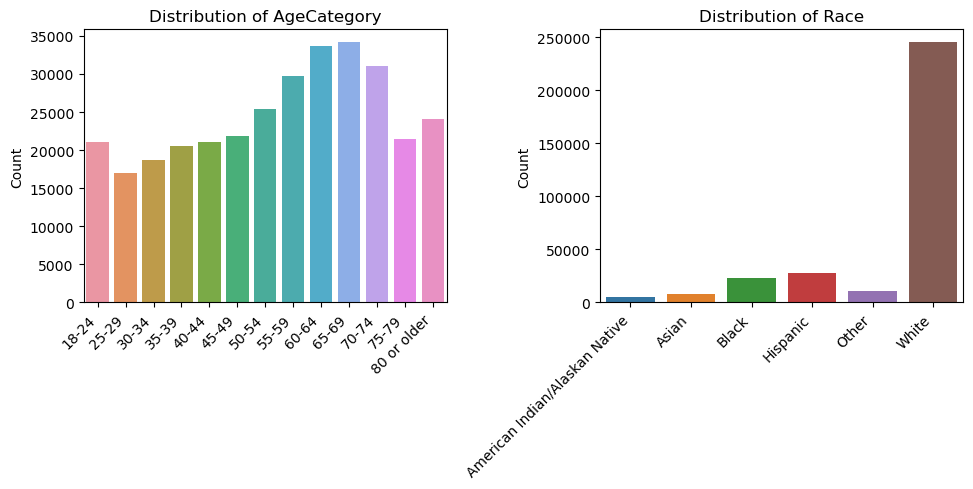

In [14]:
# Filter out categorical variables
categorical_vars = [col for col in selected_data.columns if selected_data[col].dtype == 'object' and selected_data[col].nunique() > 2]

# Calculate the number of rows needed for the subplot grid
n = len(categorical_vars)
rows = n // 3 + (n % 3 > 0)

plt.figure(figsize=(15, 5 * rows))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(rows, 3, i)
    # Determine the order alphabetically for the current variable
    order = sorted(selected_data[var].unique())
    sns.countplot(x=var, data=selected_data, order=order)
    plt.title(f'Distribution of {var}')
    plt.xlabel('')
    plt.xticks(rotation=45, ha="right")  # slight rotation so the labels on the x-axis don't overlap and are easier to distinguish
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

From the distribution of race plot it is clear that most of the data in the dataset is representative of white people as there are much more white people in the dataset than any other race combined.

#### Visualizing Numerical Variables

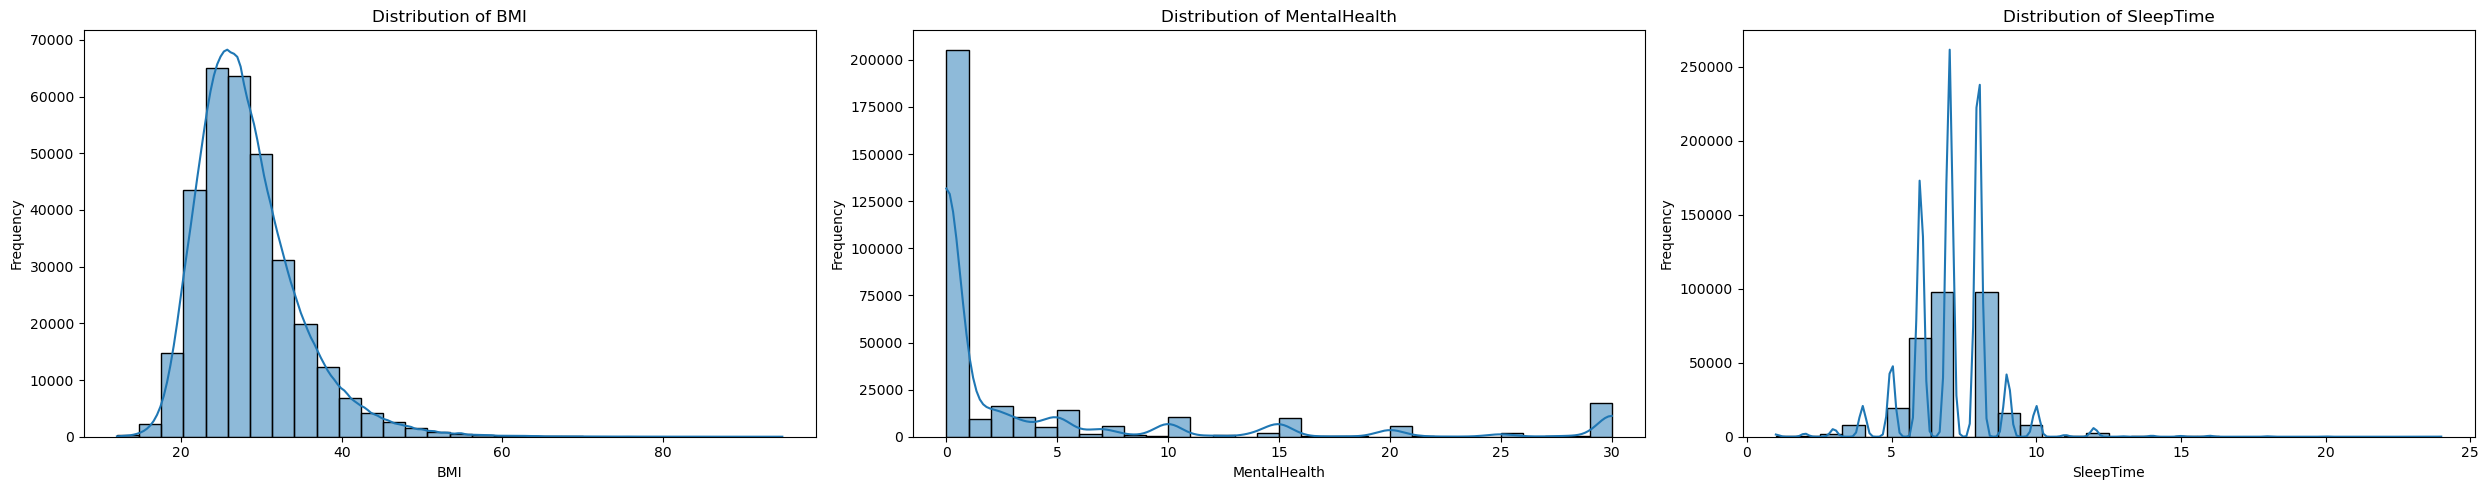

In [15]:
# Filter out numerical variables
numerical_vars = selected_data.select_dtypes(include=['float64']).columns

# Calculate the number of rows needed for the subplot grid
n = len(numerical_vars)
rows = n // 3 + (n % 3 > 0)

plt.figure(figsize=(25, 5 * rows))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(selected_data[var], kde=True, bins=30)  # KDE plot overlays a smooth curve of the distribution
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

BMI: The distribtuion appears to be unimodal as there is one clear peak suggesting that most individuals have their BMI within the range of around 25-30. This means that most of the people in the data set have a relatively healthy/slightly overweight BMI. The distribution also has a right skew which suggests that there are more individuals with a BMI above the average than below it, including some with a BMI high enough to be considered obese or extremely obese.

Mental Health: The distribution indicates that most of the sampled individuals report few to no mental health issues, with a decreasing number of individuals reporting a greater number of days with issues. The distribution is heavily right-skewed, with a long tail to the right. This skewness suggests that while the majority of individuals report lower scores, there is a subset of the population with higher mental health issue scores.

Sleep Time: The data is bi-modal, with two peaks, suggesting that there are common sleep durations around which individuals’ reports cluster. The two peak seems to be around 7 to 8 hours, which aligns with the commonly recommended amount of sleep for adults. There are bars present at the lower end of the scale, indicating that some individuals report very few hours of sleep. However, these counts are relatively low compared to the central peaks. The histogram also shows that a smaller number of individuals report very high sleep times, up to 20-24 hours, which are likely outliers or could represent data entry errors unless there's a specific justification for such long sleep durations (like a health condition).

## Encoding 

#### Encoding AgeCategory Variable using Label Encoding

In [16]:
# Inspect the unique values of the 'AgeCategory' variable to understand its categories and order
unique_age_categories = sorted(selected_data['AgeCategory'].unique())

# Create a mapping from each age category to a unique integer, preserving the order
age_category_mapping = {category: index for index, category in enumerate(unique_age_categories)}

# Apply this mapping to new 'AgeCategory' column to convert it into encoded integers
selected_data['AgeCategory_encoded'] = selected_data['AgeCategory'].map(age_category_mapping)

age_category_mapping

{'18-24': 0,
 '25-29': 1,
 '30-34': 2,
 '35-39': 3,
 '40-44': 4,
 '45-49': 5,
 '50-54': 6,
 '55-59': 7,
 '60-64': 8,
 '65-69': 9,
 '70-74': 10,
 '75-79': 11,
 '80 or older': 12}

#### Changing all Binary Variables to 0 or 1 numerical value

In [17]:
# Filter out binary variables
binary_vars = [col for col in selected_data.columns if selected_data[col].dtype == 'object' and selected_data[col].nunique() == 2]

# "No" and "Female" will be set to "0" while "Yes" and "Male" will be set to "1"
for column in binary_vars:
    selected_data[column] = selected_data[column].map({'Yes': 1, 'No': 0, 'Female' : 0, 'Male': 1})

#### One-Hot Encoding for Race Variable

In [18]:
if 'Race' in selected_data.columns:
    selected_data = pd.get_dummies(selected_data, columns=['Race'])
selected_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,AgeCategory_encoded,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,30.0,0,55-59,1,1,5.0,1,0,1,7,0,0,0,0,0,1
1,0,20.34,0,0,0.0,0,80 or older,0,1,7.0,0,0,0,12,0,0,0,0,0,1
2,0,26.58,1,0,30.0,1,65-69,1,1,8.0,1,0,0,9,0,0,0,0,0,1
3,0,24.21,0,0,0.0,0,75-79,0,0,6.0,0,0,1,11,0,0,0,0,0,1
4,0,23.71,0,0,0.0,0,40-44,0,1,8.0,0,0,0,4,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0.0,1,60-64,1,0,6.0,1,0,0,8,0,0,0,1,0,0
319791,0,29.84,1,0,0.0,1,35-39,0,1,5.0,1,0,0,3,0,0,0,1,0,0
319792,0,24.24,0,0,0.0,0,45-49,0,1,6.0,0,0,0,5,0,0,0,1,0,0
319793,0,32.81,0,0,0.0,0,25-29,0,0,12.0,0,0,0,1,0,0,0,1,0,0


## Finding Correlations

#### Finding Correlations between lifestyle factors and mental health

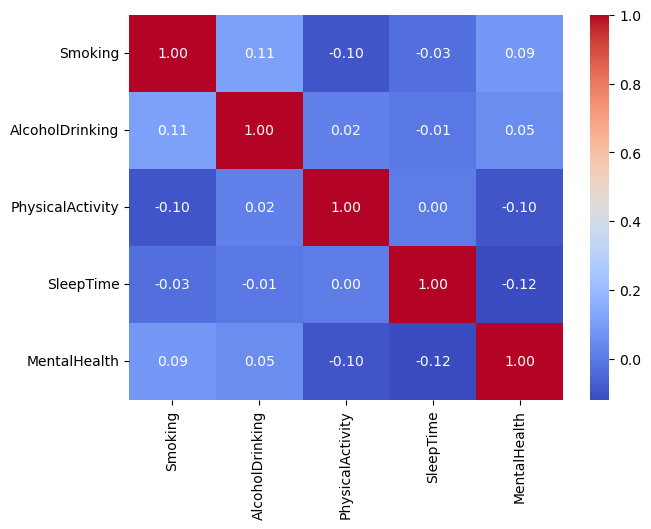

In [19]:
lifestyle_factors = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'SleepTime', 'MentalHealth']
correlation_matrix = selected_data[lifestyle_factors].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

This heat map focuses on lifestyle factors and their correlation with mental health. Given the correlation heat map, there is a slight negative correlation between sleep time and mental health. This could suggest that as people get less sleep (sleep time decreases), they seem to have more days in the months where their mental health was not good (i.e, as sleep time decreases, mental health gets worse). There is also another slight negative correlation between physical activity and mental health. This could suggest that people who tend to not get physically active, tend to have poorer mental health.

#### Finding Correlations between Mental Health and Physical Health Issues 

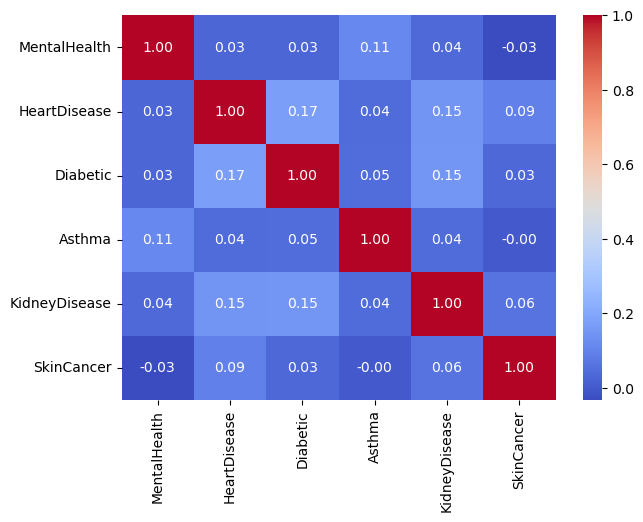

In [20]:
mentalhealth_phyiscalHealth = ['MentalHealth', 'HeartDisease', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']
correlation_matrix = selected_data[mentalhealth_phyiscalHealth].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

This heat map focuses on mental health and its correlation to physical health complications. Given this correlation heat map which has mental health alongside many physical health complications, we can see that there seems to me a slight positive correlation between asthma and mental health. This could suggest people with poorer mental health are more likely to have asthma or that people with asthma may tend to report poorer mental health.

### Showing all variables and their correlation with each others

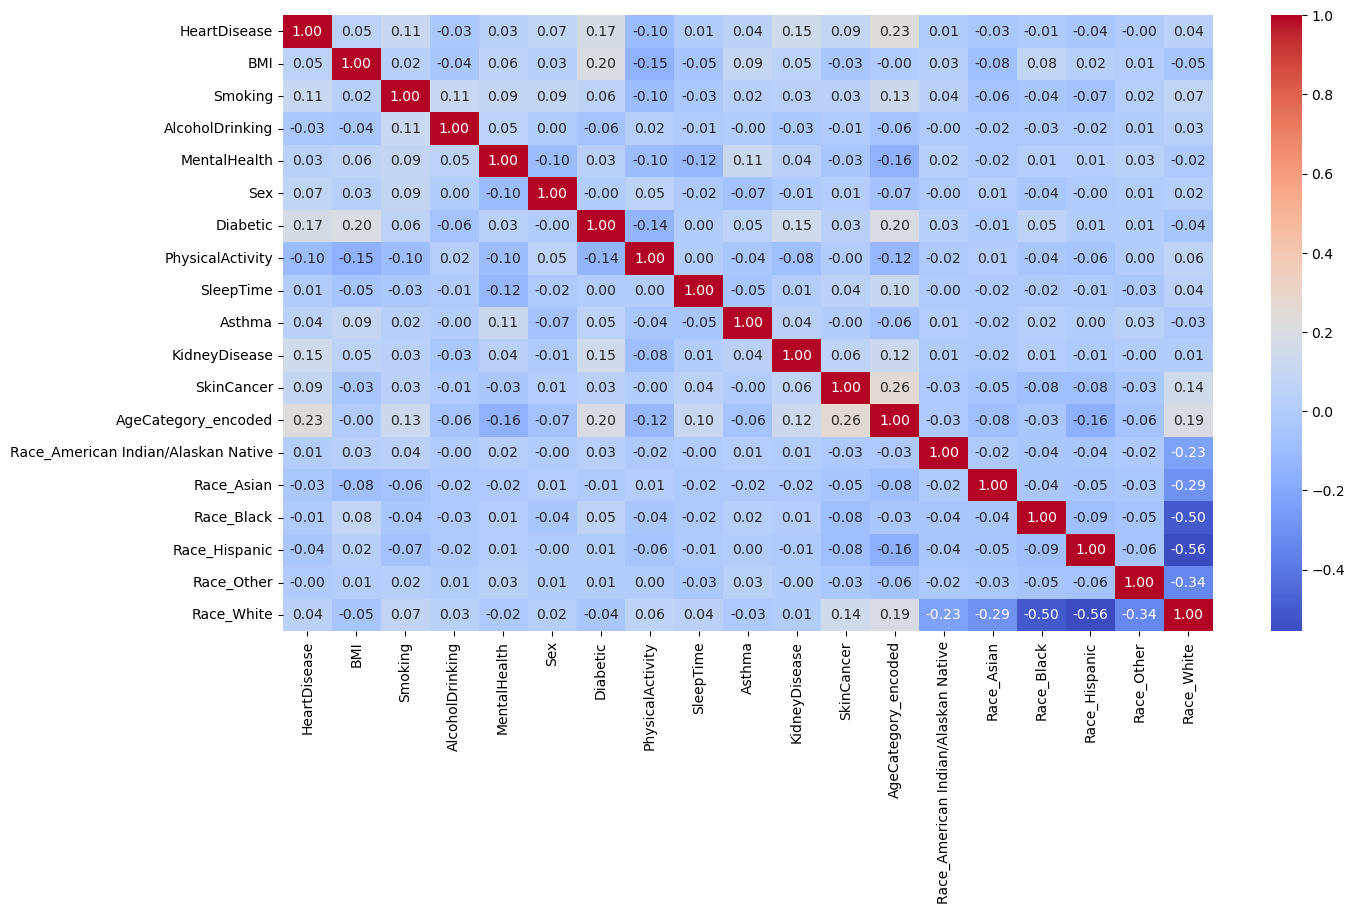

In [21]:
correlation_matrix = selected_data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

This heat map has all the variables and their correlation with one another incase there is something in the heat maps prior that we missed. Ignoring the correlations between difference races, we can see that the strongest correlation seen is between age and skin cancer. Given there it is a positive correlation, this means that as age increases, there also seem to be an increase in skin cancer. The next strongest correlation also comes from age but is its correlation with heart disease. This correlation also seems to suggest that the presence of a heart disease increases with age. While I predicted that mental health would have some sort of correlations with physical health complications, there does not seem to be much correlation with it. Also, while lifestyle factors such as smoking, drinking alcohol, physical activity, and sleep time are often associated with mental and physical health complications, this dataset seems to have very little correlation with lifestyle factors and any major health complication. The main variable that has the most correlations with health complications seems to be age. Another observation that can be made from the heat map is that race does not seem to be a factor in any of the health complications in this dataset. 

## Prediction Models

After analyzing the correlation heatmap, I have found that this dataset does not seem to have much correlation between lifestyle factors and health complications. Age seems to be the leading variable with the highest correlation with health complications. Hence, I will narrow down and focus on predicting a certain health complication, given age. Specifically, I will be focusing on the ones with most significant correlations in my dataset:

    age/skin cancer has a correlation of 0.26
    age/heart disease has a correlation of 0.23
    age/diabetic has a correlation of 0.20
    age/mental health has a correlation of -0.16

### Using Logistic Regression

I will be using logistic regression on the health complications that lead to a binary outcome (i.e. skin cancer, heart disease, and diabetic)

In [22]:
# Imports for models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import RocCurveDisplay

#### Skin Cancer Prediction Given Age

In [23]:
# Selecting the predictor and outcome variables
X = selected_data[['AgeCategory_encoded']]  # 'AgeCategory_encoded' must be numerical
y = selected_data['SkinCancer']     # Using the encoded binary outcome variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Building the Logistic Regression Model with balanced class weights
logistic_model = LogisticRegression(class_weight='balanced')

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

In [25]:
# Evaluating the Model
# Printing classification report for evaluating model performance
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC for model performance
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     57995
           1       0.19      0.71      0.30      5964

    accuracy                           0.69     63959
   macro avg       0.57      0.70      0.55     63959
weighted avg       0.89      0.69      0.76     63959

ROC-AUC: 0.766942845971423


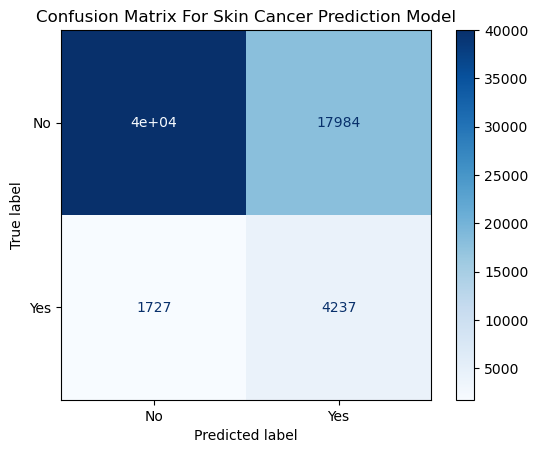

In [26]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix For Skin Cancer Prediction Model')
plt.show()

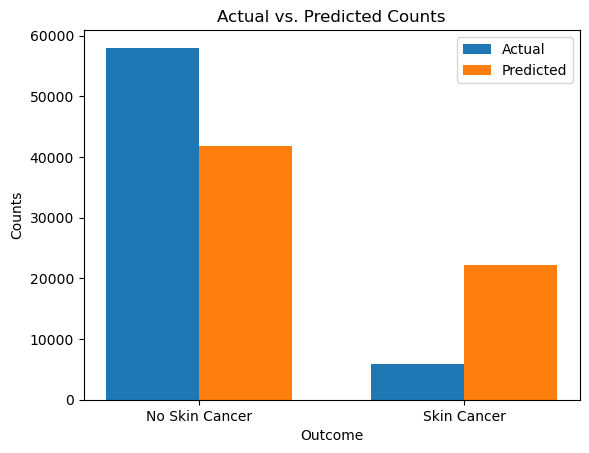

In [27]:
# Actual counts
actual_counts = np.bincount(y_test)
actual_labels = ['No Skin Cancer', 'Skin Cancer']

# Predicted counts
predicted_counts = np.bincount(y_pred)

fig, ax = plt.subplots()
index = np.arange(len(actual_labels))
bar_width = 0.35

rects1 = ax.bar(index, actual_counts, bar_width, label='Actual')
rects2 = ax.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

ax.set_xlabel('Outcome')
ax.set_ylabel('Counts')
ax.set_title('Actual vs. Predicted Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(actual_labels)
ax.legend()

plt.show()

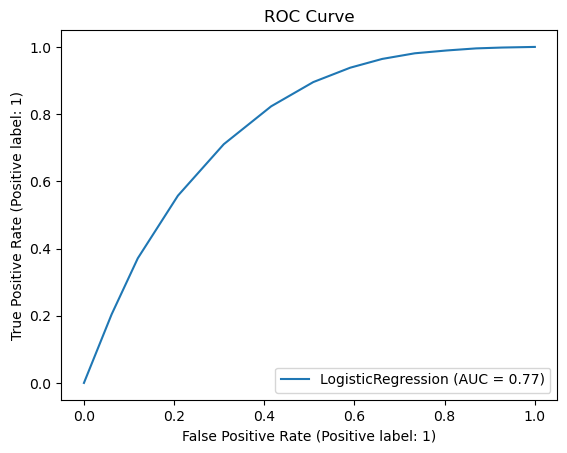

In [28]:
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

#### Heart Disease Prediction Given Age

In [29]:
# Selecting the predictor and outcome variables
X = selected_data[['AgeCategory_encoded']]  # 'AgeCategory_encoded' must be numerical
y = selected_data['HeartDisease']     # Using the encoded binary outcome variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Building the Logistic Regression Model with balanced class weights
logistic_model = LogisticRegression(class_weight='balanced')

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

In [31]:
# Evaluating the Model
# Printing classification report for evaluating model performance
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC for model performance
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.97      0.58      0.73     58484
           1       0.15      0.79      0.25      5475

    accuracy                           0.60     63959
   macro avg       0.56      0.69      0.49     63959
weighted avg       0.90      0.60      0.68     63959

ROC-AUC: 0.7449211648723189


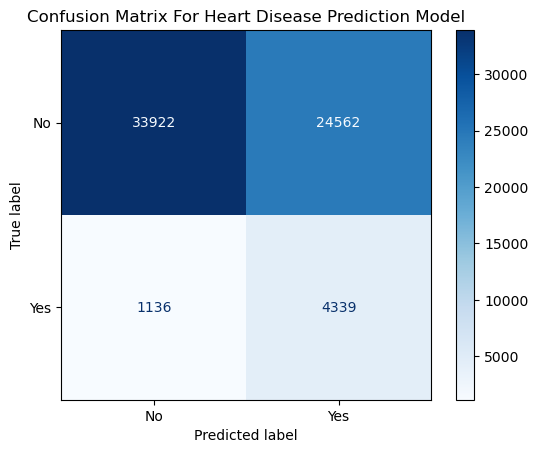

In [32]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix For Heart Disease Prediction Model')
plt.show()

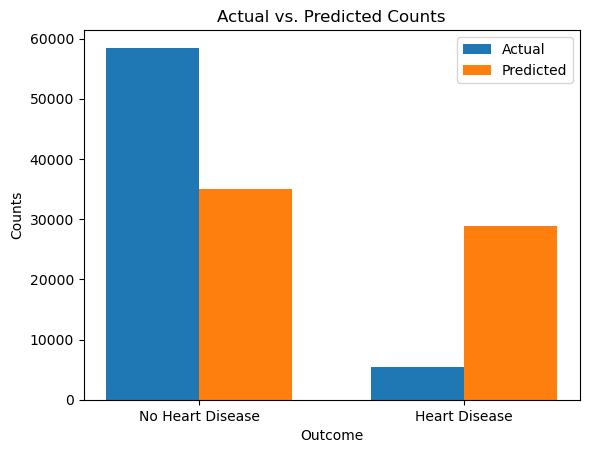

In [33]:
# Actual counts
actual_counts = np.bincount(y_test)
actual_labels = ['No Heart Disease', 'Heart Disease']

# Predicted counts
predicted_counts = np.bincount(y_pred)

fig, ax = plt.subplots()
index = np.arange(len(actual_labels))
bar_width = 0.35

rects1 = ax.bar(index, actual_counts, bar_width, label='Actual')
rects2 = ax.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

ax.set_xlabel('Outcome')
ax.set_ylabel('Counts')
ax.set_title('Actual vs. Predicted Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(actual_labels)
ax.legend()

plt.show()

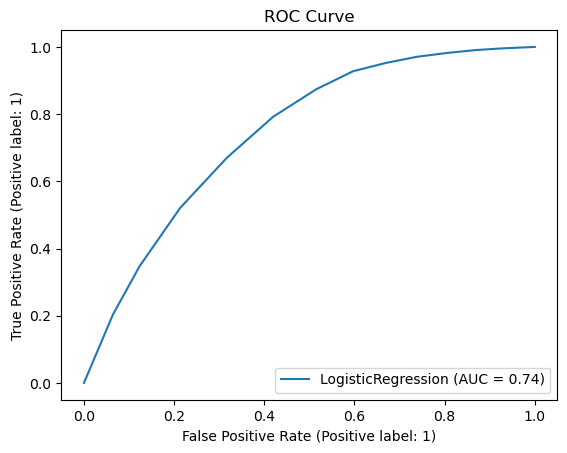

In [34]:
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

#### Diabetic Prediction Given Age

In [35]:
# Selecting the predictor and outcome variables
X = selected_data[['AgeCategory_encoded']]  # 'AgeCategory_encoded' must be numerical
y = selected_data['Diabetic']     # Using the encoded binary outcome variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
# Building the Logistic Regression Model with balanced class weights
logistic_model = LogisticRegression(class_weight='balanced')

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

In [37]:
# Evaluating the Model
# Printing classification report for evaluating model performance
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC for model performance
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.92      0.58      0.71     55287
           1       0.20      0.66      0.31      8672

    accuracy                           0.59     63959
   macro avg       0.56      0.62      0.51     63959
weighted avg       0.82      0.59      0.66     63959

ROC-AUC: 0.6632475053689978


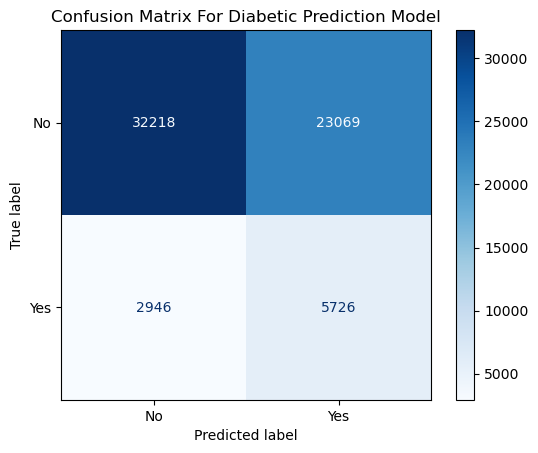

In [38]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix For Diabetic Prediction Model')
plt.show()

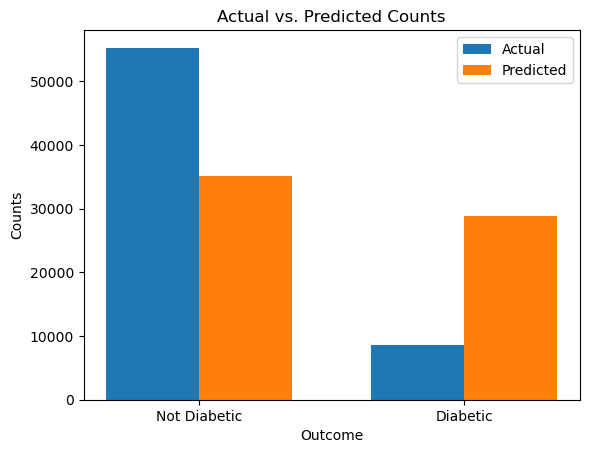

In [39]:
# Actual counts
actual_counts = np.bincount(y_test)
actual_labels = ['Not Diabetic', 'Diabetic']

# Predicted counts
predicted_counts = np.bincount(y_pred)

fig, ax = plt.subplots()
index = np.arange(len(actual_labels))
bar_width = 0.35

rects1 = ax.bar(index, actual_counts, bar_width, label='Actual')
rects2 = ax.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

ax.set_xlabel('Outcome')
ax.set_ylabel('Counts')
ax.set_title('Actual vs. Predicted Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(actual_labels)
ax.legend()

plt.show()

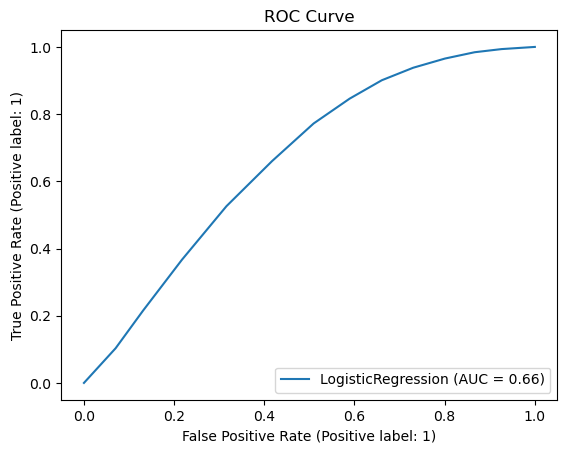

In [40]:
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

### Using Linear Regression

I will be using linear regression for mental health prediction given age

In [41]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# 'age' is the predictor
X = selected_data[['AgeCategory_encoded']]  

# 'MentalHealth' is the continuous outcome variable
y = selected_data['MentalHealth']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 61.71519375423657
R-squared: 0.023408331677560623


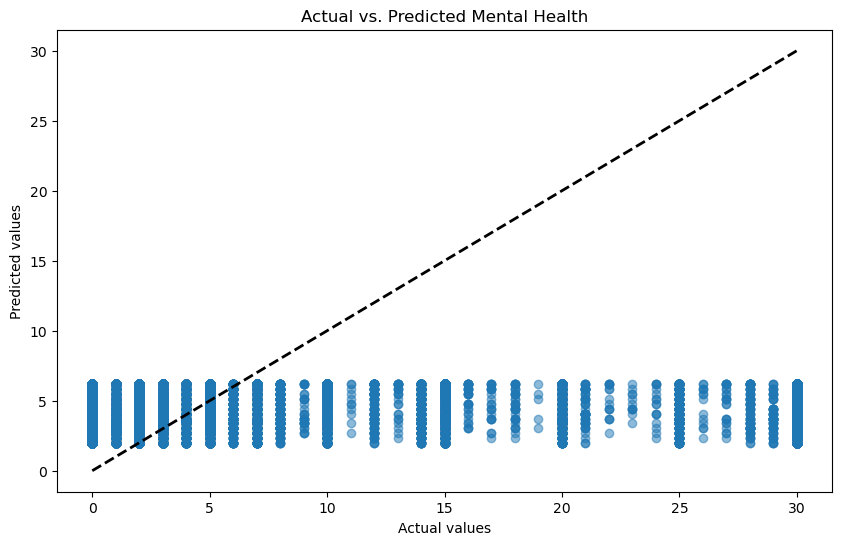

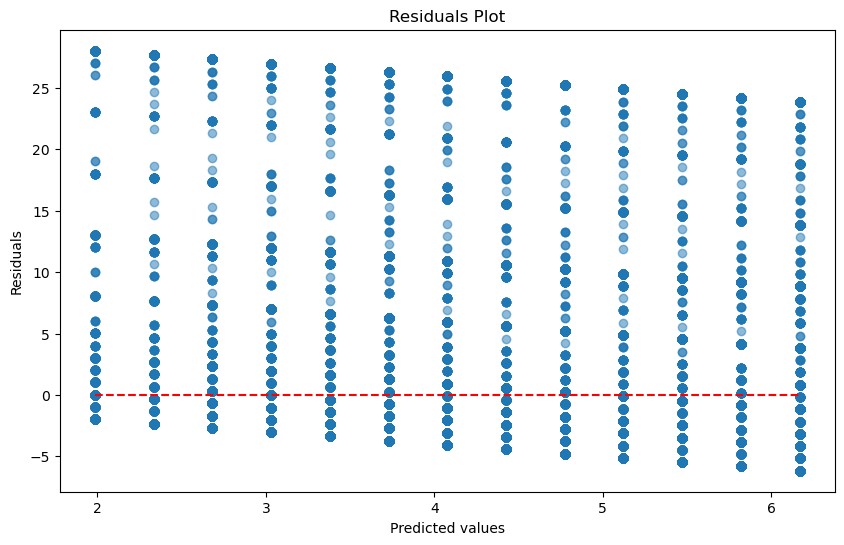

In [43]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line showing perfect predictions
plt.title('Actual vs. Predicted Mental Health')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

## Conclusions/Final Thoughts on Predictions Given Age

Beginning this project I wanted to explore how lifestyle factors such as smoking, alcohol consumption, sleep, etc. would effect mental health. I then wanted to further explore how mental health correlated with physical health complications such as heart disease, diabetes, and more. However, after analyzing the data, it was clear that this dataset did not show much correlation between lifestyle factors and mental health. It also did not show much correlation between lifestyle factors and any other physical health complication. However, what did stand out was that the variable that stands out with the strongest correlation with many of the health complications was actually age. As age increased, it seemed to correlate more with health complications and mental health. 

Although this dataset showed age as the variable which has the strongest correlations, the correlations themselves were not too strong, with the strongest only being at 0.26. This could also be seen with my prediction models. The first model I made using logistic regression to predict skin cancer in a person given age had the best model statistics. This model had an accuracy f1-score of 0.69 and a recall of 0.71 for people with skin cancer. However, as I make prediction models for the rest, the accuracy of the prediction model dropped as the correlation between age and the other health complications was also becoming less clear. 

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

#### Predicting Mental Health Given Lifestyle Factors

In [45]:
lifestyle_factors = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'SleepTime']
X_train, X_test, y_train, y_test = train_test_split(selected_data[lifestyle_factors], selected_data["MentalHealth"], test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [46]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.6415203489735611
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78     41026
         1.0       0.00      0.00      0.00      1858
         2.0       0.00      0.00      0.00      3318
         3.0       0.00      0.00      0.00      2155
         4.0       0.00      0.00      0.00      1075
         5.0       0.00      0.00      0.00      2876
         6.0       0.00      0.00      0.00       288
         7.0       0.00      0.00      0.00      1050
         8.0       0.00      0.00      0.00       207
         9.0       0.00      0.00      0.00        35
        10.0       0.00      0.00      0.00      2064
        11.0       0.00      0.00      0.00        11
        12.0       0.00      0.00      0.00       143
        13.0       0.00      0.00      0.00        27
        14.0       0.00      0.00      0.00       443
        15.0       0.00      0.00      0.00      1984
        16.0       0.00      0.00      0.00        3

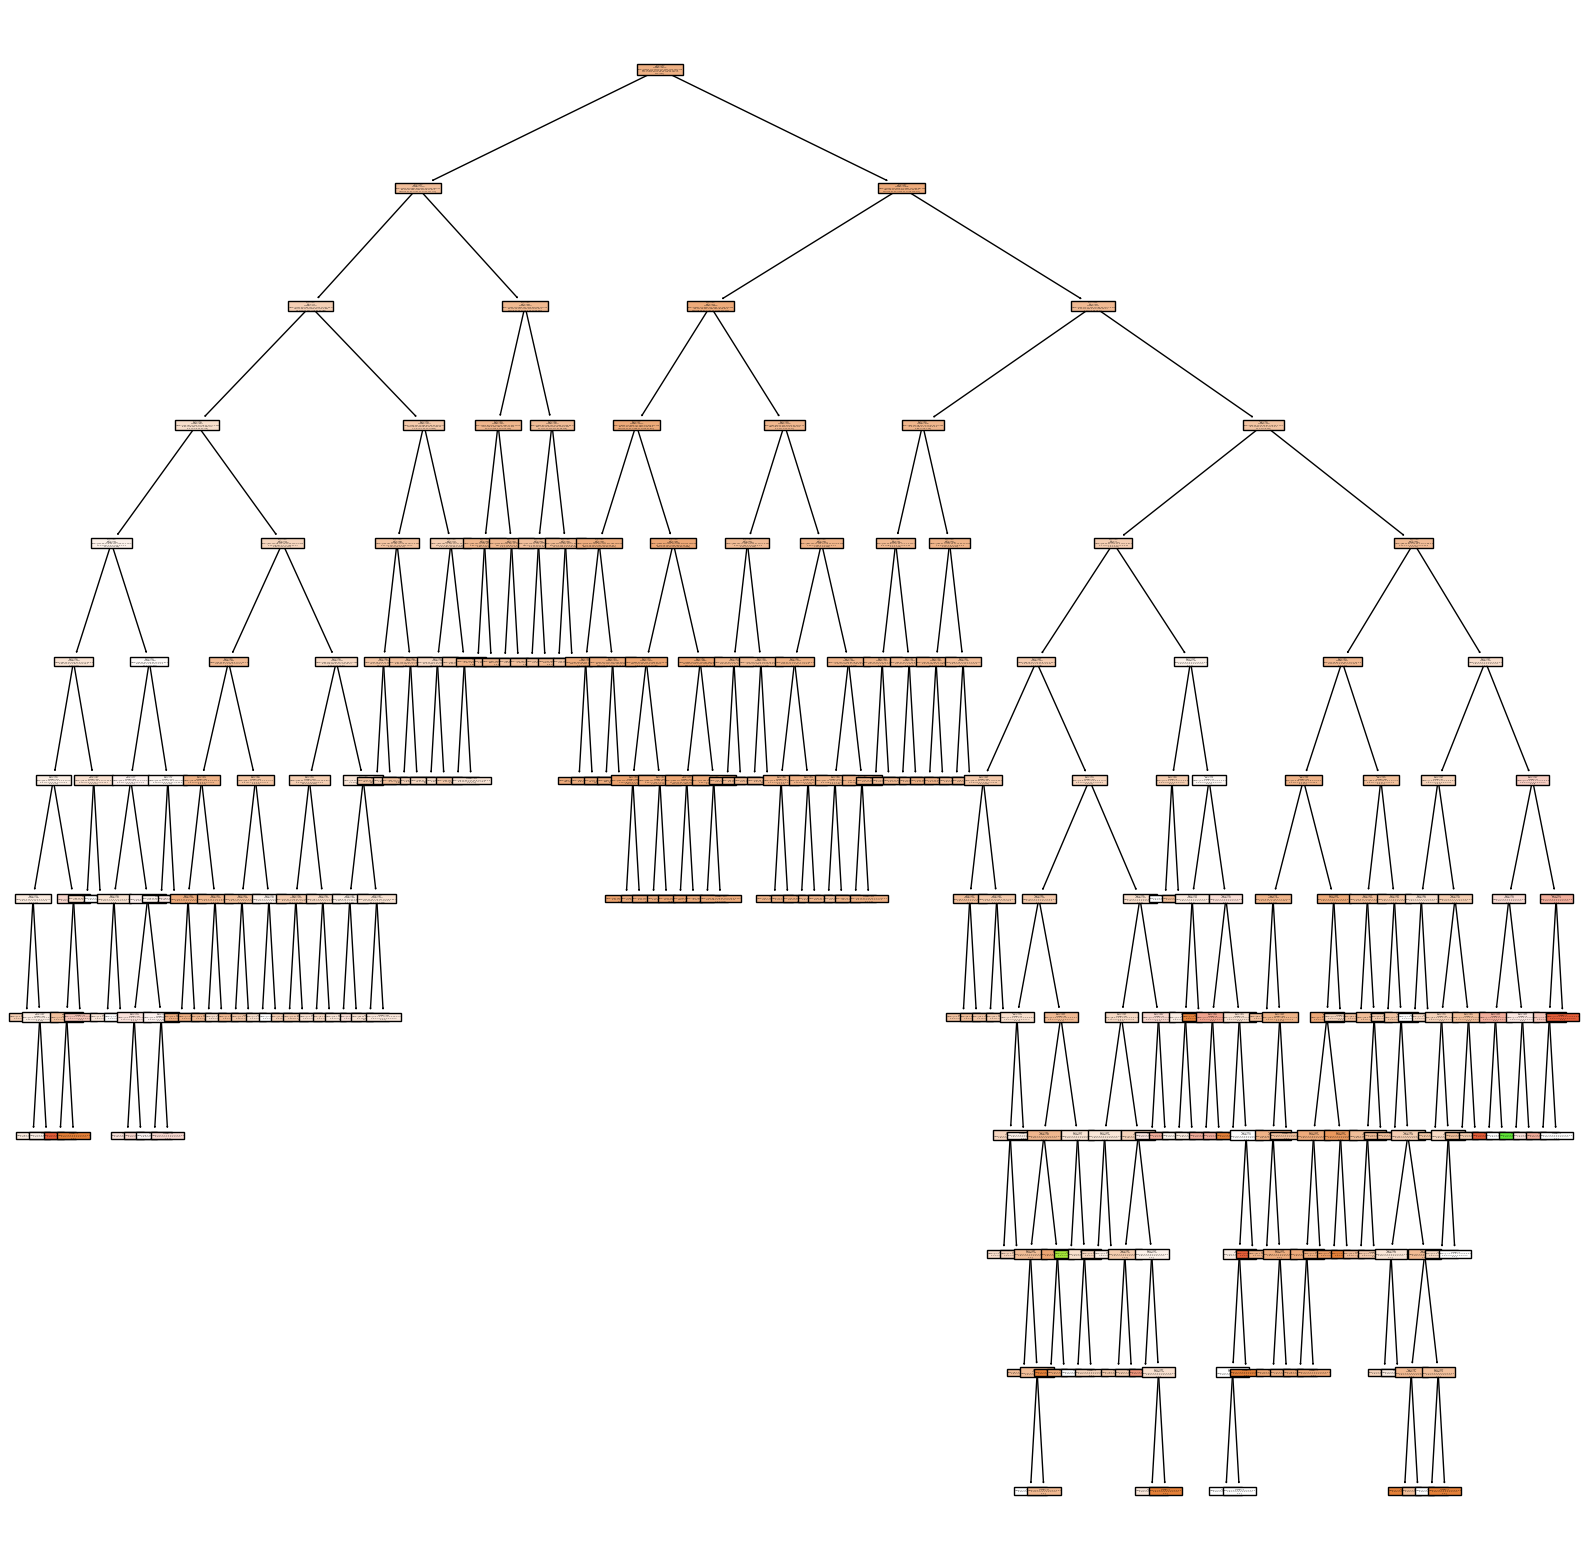

In [47]:
plt.figure(figsize=(20, 20))  # Increase the figure size and DPI for better resolution
plot_tree(decision_tree_model, filled=True)  # You can also adjust fontsize as needed
plt.show()

#### Predicting Skin Cancer Given Lifestyle Factors

In [48]:
lifestyle_factors = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'SleepTime']
X_train, X_test, y_train, y_test = train_test_split(selected_data[lifestyle_factors], selected_data["SkinCancer"], test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [49]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9065182382463766
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     57980
           1       0.00      0.00      0.00      5979

    accuracy                           0.91     63959
   macro avg       0.45      0.50      0.48     63959
weighted avg       0.82      0.91      0.86     63959



#### Predicting Heart Disease Given Lifestyle Factors

In [50]:
lifestyle_factors = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'SleepTime']
X_train, X_test, y_train, y_test = train_test_split(selected_data[lifestyle_factors], selected_data['HeartDisease'], test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [51]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9125689895089042
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       0.00      0.00      0.00      5592

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959



#### Predicting Diabetic Given Lifestyle Factors

In [52]:
lifestyle_factors = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'SleepTime']
X_train, X_test, y_train, y_test = train_test_split(selected_data[lifestyle_factors], selected_data['Diabetic'], test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [53]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8650072702825248
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     55331
           1       0.31      0.00      0.00      8628

    accuracy                           0.87     63959
   macro avg       0.59      0.50      0.46     63959
weighted avg       0.79      0.87      0.80     63959



## Conclusions

As mentioned before, I wanted to explore how lifestyle factors such as smoking, alcohol consumption, sleep, etc. would effect mental health and then see how mental health associated with physical health issues. However, after deep analysis of the dataset, it is unreliable to predict these health issues with the limited lifestyle factors. The correlations made between them were not linear which makes it hard to create accurate prediction models. After creating a few models with age being the given data, I created some decision trees using the lifestyle factors alone to attempt to predict the health issues. Although the models come back with high accuracy, the models would not be helpful in a medical context where the ability to correctly identify the positive cases is crucial. The issue is caused by the class imbalance as not having a health issue heavily outnumbers having one. This can be seen through the accuracy report of the models as even though they are scoring high in accuracy, when it comes to the precision/recall of actually having an issue, it tends to come close to 0 meaning it is not performing well at predicting the cases where the person should have a health issue. 

Overall, this project was really eye-opening on how much data needs to go into accurately predicting these sort of things. The dataset I used seemed to lack enough information to accurately predict these sort of things as there are a lot of other factors missing such as medical history, demographics, biological markers, environmental factors, and much more.